In [1]:
import sys

print(sys.path)

import pandas as pd
from geopy.geocoders import Nominatim
import asyncio
import threading
import pickle
import sqlite3
import time
from SPARQLWrapper import SPARQLWrapper, JSON
from playwright.async_api import Page, expect, async_playwright, Playwright, TimeoutError
import random
import numpy as np
from datetime import datetime
#from homeharvest import scrape_property
#from sqlalchemy import create_engine
import requests
import matplotlib.pyplot as plt
from homeharvest import scrape_property
from datetime import datetime
from scipy.stats import pearsonr


['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\python310.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib', 'C:\\Users\\chuch\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0', 'c:\\Users\\chuch\\OneDrive\\Desktop\\coding\\CriminalTracker\\.venv', '', 'c:\\Users\\chuch\\OneDrive\\Desktop\\coding\\CriminalTracker\\.venv\\lib\\site-packages', 'c:\\Users\\chuch\\OneDrive\\Desktop\\coding\\CriminalTracker\\.venv\\lib\\site-packages\\win32', 'c:\\Users\\chuch\\OneDrive\\Desktop\\coding\\CriminalTracker\\.venv\\lib\\site-packages\\win32\\lib', 'c:\\Users\\chuch\\OneDrive\\Desktop\\coding\\CriminalTracker\\.venv\\lib\\site-packages\\Pythonwin']


This project relates house prices to number of sex offenders in the area,taking into account the density of the area. The area is retrieved via sql databases which contain the USPS and GEOID for the appropiate county. Right now this program only factors in the state of california, due to my limited amount of requests from the crimeometer api. When I recieve the proper amount of api requests.

I chose 1500 houses as I felt it was more represeantive of the region, and any additional houses in the data set had a neglible impact on the final results.



In [2]:
import seaborn as sb

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.optimize import curve_fit

In [4]:
from sqlalchemy import create_engine, types

In [ ]:
states = [ 
"NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
"SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]


In [13]:
conn = sqlite3.connect('HouseData.db')
cursor = conn.cursor()


In [ ]:
cursor.execute("SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';")
names = cursor.fetchall()    
print(names)

In [10]:
def propertiesTosSql(properties,state):
    properties.to_sql(state, conn, if_exists='replace', index=False)
    cursor.execute("SELECT name FROM sqlite_master WHERE type ='table' AND name NOT LIKE 'sqlite_%';")
    databaseNames = cursor.fetchall()
    print(databaseNames)
    print(cursor.fetchall())

In [98]:

    current_timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"HomeHarvest_{'CA'}.csv"
    properties = scrape_property(
    location= "CA",
    listing_type="for_sale",  # or (for_sale, for_rent, pending)
  # sold in last 30 days - listed in last 30 days if (for_sale, for_rent)

  # date_from="2023-05-01", # alternative to past_days
  # date_to="2023-05-28",
  # foreclosure=True
  # mls_only=True,  # only fetch MLS listings
    )
    print(len(properties))
    
    if 'agent_phones' in properties.columns:
      properties.drop('agent_phones', axis = 1, inplace=True)
    if (len(properties) > 1000):
      propertiesTosSql(properties.sample(n=1500),"CA")
    else:
      propertiesTosSql(properties,"CA")


9438
[('AL',), ('AK',), ('AZ',), ('AR',), ('CO',), ('CT',), ('DE',), ('FL',), ('GA',), ('HI',), ('ID',), ('IL',), ('IN',), ('IA',), ('KS',), ('KY',), ('LA',), ('ME',), ('MD',), ('MA',), ('MI',), ('MN',), ('MS',), ('MO',), ('MT',), ('NE',), ('NV',), ('NH',), ('NY',), ('NC',), ('ND',), ('OH',), ('OK',), ('OR',), ('PA',), ('RI',), ('SC',), ('SD',), ('TN',), ('TX',), ('UT',), ('VT',), ('VA',), ('WA',), ('WV',), ('WI',), ('WY',), ('NM',), ('StateHouseData',), ('CountiesAndDistricts',), ('areaCensus',), ('censusData',), ('CA',)]
[]


In [111]:
conn = sqlite3.connect('HouseData.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM CA")
prices = cursor.fetchall()
print(prices[0])
print("this is the length of prices: " + str(len(prices)))
conn.commit()


('https://www.realtor.com/realestateandhomes-detail/2542608562', 'TUCA', '20240650', 'FOR_SALE', "143 ACRE RANCHETTE with rolling pastures and 2 YEAR-ROUND CREEKS. This unique property is just over 10 minutes to major shopping, yet provides a rural setting that can accommodate an array of uses. Whether you are looking to farm or simply seek more privacy and land this property is well suited to meet your needs. Established onsite is a 1 bedroom studio above a finished 2 car garage with all your essential needs of a full kitchen, bathroom, laundry and central heat & air. A smaller fenced pasture surrounds the studio to keep livestock within and offers water in multiple locations. Below the home sits a detached workshop plenty big to store recreational vehicles, work on projects or provide storage. As you explore the grounds and head towards the back end you will cross Sullivan Creek and reach the crest of the hill. From the back center you will find scenic views and seasonal streams. Exp

In [104]:
conn = sqlite3.connect('HouseData.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM CA")
prices = cursor.fetchall()
print("this is the length of prices: " + str(len(prices)))

this is the length of prices: 1500


In [ ]:
cursor.execute("select state from NY ")
rows = cursor.fetchall()
print(len(rows))

In [ ]:






query  = """

CREATE TABLE StateHouseData2 AS
SELECT * FROM AL
UNION
SELECT * FROM AK
UNION
SELECT * FROM AZ
UNION
SELECT * FROM AR
UNION
SELECT * FROM CA
UNION
SELECT * FROM CO
UNION
SELECT * FROM CT
UNION
SELECT * FROM DE
UNION
SELECT * FROM FL
UNION
SELECT * FROM GA
UNION
SELECT * FROM HI
UNION
SELECT * FROM ID
UNION
SELECT * FROM IL
UNION
SELECT * FROM "IN"
UNION
SELECT * FROM IA
UNION
SELECT * FROM KS
UNION
SELECT * FROM KY
UNION
SELECT * FROM LA
UNION
SELECT * FROM ME
UNION
SELECT * FROM MD
UNION
SELECT * FROM MA
UNION
SELECT * FROM MN
UNION
SELECT * FROM MS
UNION
SELECT * FROM MO
UNION
SELECT * FROM MT
UNION
SELECT * FROM NE
UNION
SELECT * FROM NV
UNION
SELECT * FROM NH
UNION
SELECT * FROM NM
UNION
SELECT * FROM NY
UNION
SELECT * FROM NC
UNION
SELECT * FROM ND
UNION
SELECT * FROM OH
UNION
SELECT * FROM OK
UNION
SELECT * FROM "OR"
UNION
SELECT * FROM PA
UNION
SELECT * FROM RI
UNION
SELECT * FROM SC
UNION
SELECT * FROM SD
UNION
SELECT * FROM TN
UNION
SELECT * FROM TX
UNION
SELECT * FROM UT
UNION
SELECT * FROM VT
UNION
SELECT * FROM VA
UNION
SELECT * FROM WA
UNION
SELECT * FROM WV
UNION
SELECT * FROM WI
UNION
SELECT * FROM WY
"""

cursor.execute(query)

In [53]:
def getCensusSquareMiles():
    print("IN READ CENSUS")
    conn = sqlite3.connect("HouseData.db")
    cursor = conn.cursor()

    df = pd.read_csv('2020Gaz.txt', sep='\t')
    df["GEOID_5_digits"] = df["GEOID"].apply(lambda x : f"{x:05d}")
    df.to_sql("censusData", conn, if_exists='replace', index=False)


In [54]:
getCensusSquareMiles()

conn = sqlite3.connect("HouseData.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM censusData")
results = cursor.fetchall()[0]
print(results)

IN READ CENSUS
('AL', 1001, 161526, 'Autauga County', 1539634184, 25674812, 594.456, 9.913, 32.532237, -86.64644, '01001')


In [16]:
getCensusSquareMiles()





IN READ CENSUS


C:\Users\chuch\AppData\Local\Temp\ipykernel_5708\1362346661.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extracteddata["GEOID"] = extracteddata["GEOID"].astype(str).str[:5]


In [ ]:

cursor.execute("PRAGMA table_info('areaCensus')")
columns = cursor.fetchall()

# Find and print the type of the specific column
for column in columns:
    if column[1] == 'GEOID':
        print(f"Column Type for '{column[1]}': {column[2]}")

print(cursor.fetchall())

In [46]:
cursor.execute("SELECT county Density FROM StateHouseData Where Density < 50 And state = ? ", ("CA",))
results = cursor.fetchall()
print(results)

[('Los Angeles',), ('San Diego',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('San Diego',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Riverside',), ('Los Angeles',), ('Humboldt',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('San Bernardino',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('Los Angeles',), ('San Bernardino',), ('Los Angeles',), ('Shasta',), ('Los Angeles',), ('Los Angeles',), ('Orange',), ('Los Angeles',), ('Los Angeles',), ('Lo

In [27]:
def state_to_fips(state_input):
    # Mapping of state names and abbreviations to FIPS codes
    states = {
        "Alabama": "01", "AL": "01",
        "Alaska": "02", "AK": "02",
        "Arizona": "04", "AZ": "04",
        "Arkansas": "05", "AR": "05",
        "California": "06", "CA": "06",
        "Colorado": "08", "CO": "08",
        "Connecticut": "09", "CT": "09",
        "Delaware": "10", "DE": "10",
        "Florida": "12", "FL": "12",
        "Georgia": "13", "GA": "13",
        "Hawaii": "15", "HI": "15",
        "Idaho": "16", "ID": "16",
        "Illinois": "17", "IL": "17",
        "Indiana": "18", "IN": "18",
        "Iowa": "19", "IA": "19",
        "Kansas": "20", "KS": "20",
        "Kentucky": "21", "KY": "21",
        "Louisiana": "22", "LA": "22",
        "Maine": "23", "ME": "23",
        "Maryland": "24", "MD": "24",
        "Massachusetts": "25", "MA": "25",
        "Michigan": "26", "MI": "26",
        "Minnesota": "27", "MN": "27",
        "Mississippi": "28", "MS": "28",
        "Missouri": "29", "MO": "29",
        "Montana": "30", "MT": "30",
        "Nebraska": "31", "NE": "31",
        "Nevada": "32", "NV": "32",
        "New Hampshire": "33", "NH": "33",
        "New Jersey": "34", "NJ": "34",
        "New Mexico": "35", "NM": "35",
        "New York": "36", "NY": "36",
        "North Carolina": "37", "NC": "37",
        "North Dakota": "38", "ND": "38",
        "Ohio": "39", "OH": "39",
        "Oklahoma": "40", "OK": "40",
        "Oregon": "41", "OR": "41",
        "Pennsylvania": "42", "PA": "42",
        "Rhode Island": "44", "RI": "44",
        "South Carolina": "45", "SC": "45",
        "South Dakota": "46", "SD": "46",
        "Tennessee": "47", "TN": "47",
        "Texas": "48", "TX": "48",
        "Utah": "49", "UT": "49",
        "Vermont": "50", "VT": "50",
        "Virginia": "51", "VA": "51",
        "Washington": "53", "WA": "53",
        "West Virginia": "54", "WV": "54",
        "Wisconsin": "55", "WI": "55",
        "Wyoming": "56", "WY": "56"
    }

    # Convert input to uppercase for flexible matching
    state_input_upper = state_input.upper()

    # Find and return the FIPS code
    fips_code = states.get(state_input_upper, "State not found")
    return fips_code



In [ ]:
cursor.execute ( "SELECT GEOID, ALAND_SQMI, AWATER_SQMI FROM censusData WHERE USPS = ? AND Name = ?", "AL", (countyQuery)))


In [25]:
def getCountyCode(state, checkCounty):
    stateCode = state_to_fips(state)
    print("this is the stateCode: " + stateCode)
    countyQuery = checkCounty + " County"
    print("this isthe countyQuery:" + countyQuery)
   # print("this is the county we are workign with:" + checkCounty)
    cursor.execute ( "SELECT GEOID_5_digits, ALAND_SQMI, AWATER_SQMI FROM censusData WHERE USPS = ? AND Name = ?", (state, (countyQuery)))
    
    try:
        (geoid,aland_sqmi,awater_sqmi)= cursor.fetchall()[0]
        print("this is the geoid: "+ str(geoid))
        return (str(geoid), (aland_sqmi + awater_sqmi))

    except IndexError:
            print("cound not find the data")
            return None

In [107]:
conn.commit()

In [ ]:
us_census_key = ""


cursor.execute("SELECT DISTINCT State, county FROM CA ")


stateData = cursor.fetchall()
print("this is the state data: " + str(stateData))
#cursor = conn.cursor()
#cursor.execute("SELECT DISTINCT State, county FROM StateHouseData")
#rows = cursor.fetchall()

# Construct the base URL for the API request
#url = "https://api.census.gov/data/2021/pep/population"
#url = "https://api.census.gov/data/2021/pep/population?get=DENSITY_2021,POP_2021,NAME&for=state:06&key={us_census_key}"

for (state, county) in stateData:
    url = "https://api.census.gov/data/2020/acs/acs5"
    
    if (state != None and county != None):
        print("this is the state:" + state)
        print("this is the county: " + county)
        
        



        tupRet = getCountyCode(state, county)

        
        if (tupRet):
            (countyCode, area) = tupRet
            

            countyCode = countyCode[2:5]
            print(countyCode)
            fipState = state_to_fips(state)
            print("this is the stateCode: " + str(fipState))
            
            
            params = {
            'get': 'B01003_001E',  # Total population
            'for': f'county:{countyCode}',
            'in': f'state:{fipState}',
            'key': ''
             }
            url = "https://api.census.gov/data/2020/acs/acs5"
            
            response = requests.get(url, params=params)

            if response.status_code == 200:
                data = response.json()
                print("this is the data:" + str(data))
                population = data[1][0]
                print("this is the county:" + county)
                density = float(float(population)/area)
                print("DENSITY: " + str(density))
                cursor.execute("UPDATE CA SET Density = ? WHERE county = ? AND state = ?", ( (float(population)/area), county, state))    

            else:
                print("Failed to retrieve data:", response.status_code)
                print("Response text:", response.text)


# Set the parameters for the request
#params = {
#    'get': 'DENSITY_2021,POP_2021,Orange County,California',  # The data fields you want to retrieve
#    'for': 'region:*',  # Fetch data for all regions
 #   'key': us_census_key


In [142]:
cursor.execute("SELECT DENSITY FROM CA WHERE DENSITY > 1000")
densities = cursor.fetchall()
print(len(densities))

606


In [30]:
cursor.execute("DELETE FROM CA WHERE county = ?", ("Creek County",))

In [35]:
cursor.execute("DELETE FROM CA WHERE density = NULL")

In [42]:
cursor.execute("SELECT county FROM CA WHERE county = ? ", ("Creek County",))
res = cursor.fetchall()
print(res[0:100])

[]


In [16]:
conn.commit()
conn.close()

In [ ]:
def deleteDuplicate():
    query = """DELETE FROM stateHouseData
    WHERE rowid NOT IN (
    SELECT rowid
    FROM (
    SELECT rowid, RANK() OVER (PARTITION BY column1, column2 ORDER BY date_column DESC) as rank
    FROM stateHouseData
  ) WHERE rank = 1
    );b"""
    cursor.execute(query)

In [ ]:
deleteDuplicate()

In [ ]:
cursor.execute("PRAGMA table_info(StateHouseData)")
columns = cursor.fetchall()
print(columns)
rows = (cursor.fetchall())
print(len(rows))
# Print the name of each column


In [ ]:
def getCriminals():
     cursor.execute("SELECT * FROM CA ", state)

In [ ]:
cursor.execute("ALTER TABLE stateHouseData ADD DENSITY FLOAT")

In [ ]:
cursor.execute("ALTER TABLE StateHouseData ADD  numCriminals INT")

In [68]:
def deleteDup():
    query = """ DELETE FROM CAFINALTABLE
    WHERE rowid NOT IN (
    SELECT MIN(rowid)
    FROM CAFINALTABLE
    GROUP BY property_url
    );"""
    cursor.execute(query)

In [69]:
deleteDup()

In [6]:
conn = sqlite3.connect("HouseData.db")
cursor = conn.cursor()
cursor.execute("SELECT DENSITY FROM StateHouseData")
densities = cursor.fetchall()
print("densities below:")
print(densities)

densities below:
[(None,), (None,), (None,), (133.17027709821116,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (2114.0770280285674,), (734.4488335989952,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (None,), (2114.0770280285674,), (None,), (2114.0770280285674,), (None,), (None,), (None,), (2114.0770280285674,), (None,), (None,), (None,), (None,), (None,), (None,), (2114.0770280285674,), (None,), (None,), (None,), (None,), (None,), (None,), (2114.0770280285674,), (None,), (None,), (2114.0770280285674,), (None,), (None,), (2114.0770280285674,), (2114.0770280285674,), (2114.0770280285674,), (None,), (None,), (78.13475761429252,), (None,), (None,), (None,), (44.196017845053554,), (None,), (None,), (2114.0770280285674,), (None,), (None,), (None,), (None,), (None,), (2114.0770280285674,), (None,), (734.4488335989952,), (None,), (None,), (None,), (None,), 

In [ ]:
def foop():
    print("foop")

In [15]:
cursor.execute("SELECT * from StateHouseData where state = ?" , ("CA",))
densities = cursor.fetchall()[0]
print(densities)

('https://www.realtor.com/realestateandhomes-detail/1001247236', 'MRCA', 'SN24085657', 'FOR_SALE', 'A TRUE one-of-a-kind estate nestled on a picturesque 21.44-acre almond orchard minutes from both Chico and Durham. This spectacular retreat offers an unparalleled blend of luxury, privacy and functionality. Boasting over 7, 000 square feet of living space, the residence features 5 bedrooms and 6 bathrooms, complemented by inviting formal living and dining areas. The gourmet kitchen, complete with double ovens, dual sinks and dishwashers is a culinary enthusiasts and entertainers dream. Social and family options abound with a media room featuring surround sound, a separate billiard loft, and an exercise room. Ascend the 4-story lookout tower equipped as a poker room with wet bar, and youll find breathtaking valley views over your orchard. An 1, 100-bottle wine cellar adds a touch of elegance for the collector. The outdoor oasis includes a heated in-ground pool, fire pit, and expansive cov

In [21]:

cursor.execute("UPDATE StateHouseData SET numCriminals=Null")

In [87]:
cursor.execute("PRAGMA table_info(StateHouseData)")
names = cursor.fetchall()
print("THESE ARE THE NAMES:" + str(names))
cursor.execute("SELECT list_price from StateHouseData WHERE list_price < 500000 and state = ?", ("CA",))
results = cursor.fetchall()
cursor.execute("SELECT list_price from StateHouseData WHERE list_price > 1000000 and state = ?", ("CA",))
results = cursor.fetchall()
print(results)

print(len(results))

THESE ARE THE NAMES:[(0, 'property_url', 'TEXT', 0, None, 0), (1, 'mls', 'TEXT', 0, None, 0), (2, 'mls_id', 'TEXT', 0, None, 0), (3, 'status', 'TEXT', 0, None, 0), (4, 'text', 'TEXT', 0, None, 0), (5, 'style', 'TEXT', 0, None, 0), (6, 'full_street_line', 'TEXT', 0, None, 0), (7, 'street', 'TEXT', 0, None, 0), (8, 'unit', 'TEXT', 0, None, 0), (9, 'city', 'TEXT', 0, None, 0), (10, 'state', 'TEXT', 0, None, 0), (11, 'zip_code', 'TEXT', 0, None, 0), (12, 'beds', 'INT', 0, None, 0), (13, 'full_baths', 'INT', 0, None, 0), (14, 'half_baths', 'INT', 0, None, 0), (15, 'sqft', 'INT', 0, None, 0), (16, 'year_built', 'INT', 0, None, 0), (17, 'days_on_mls', 'INT', 0, None, 0), (18, 'list_price', 'INT', 0, None, 0), (19, 'list_date', 'TEXT', 0, None, 0), (20, 'sold_price', 'TEXT', 0, None, 0), (21, 'last_sold_date', 'TEXT', 0, None, 0), (22, 'assessed_value', 'INT', 0, None, 0), (23, 'estimated_value', 'INT', 0, None, 0), (24, 'lot_sqft', 'INT', 0, None, 0), (25, 'price_per_sqft', 'INT', 0, None, 0)

[1150000, 125000, 1595000, 850000, 550000, 819900, 4995000, 779000, 506779, 615000, 325000, 1649000, 367990, 740000, 812000, 975000, 798000, 417000, 11500, 818000, 2388000, 1250000, 1799900, 999000, 319000, 1995000, 399000, 701000, 830000, 635000, 1389000, 525000, 1600000, 599999, 5500000, 733500, 2499000, 1150000, 450000, 1100000, 4495000, 2000000, 49900, 1350000, 689900, 1299950, 119000, 899000, 399900, 769990, 84900, 714999, 1195000, 1995000, 862085, 699000, 440000, 750000, 52000, 19950000, 350000, 1699000, 425000, 99999, 850000, 45000, 2349880, 229999, 94900, 3498000, 799000, 649000, 569000, 548010, 675000, 1549000, 1150000, 519900, 639900, 1029000, 1699000, 2248000, 395000, 4995000, 560000, 1498000, 599000, 449999, 340000, 329000, 2195000, 539000, 20000, 449000, 99000, 452819, 919000, 489900, 1898000, 305000, 987590, 2599999, 299999, 8770000, 1499999, 697790, 2499000, 879900, 2495000, 3199000, 694995, 748888, 1098000, 815000, 988800, 1099950, 559290, 850000, 775000, 729000, 485000

<Axes: ylabel='Count'>

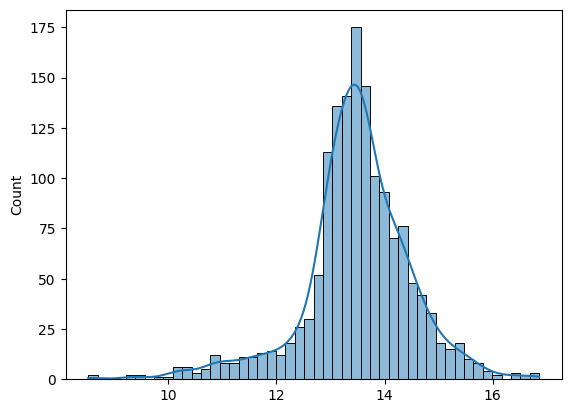

In [118]:

cursor.execute("SELECT list_price from CA Where state = ?", ("CA",))
prices = cursor.fetchall()
prices = [price[0] for price in prices]

print(prices)
#sb.histplot(prices, kde=True)
log_prices = np.log(prices)
sb.histplot(log_prices, kde=True)

In [120]:
cursor.execute("ALTER TABLE CA ADD numCriminal Int" )


OperationalError: duplicate column name: numCriminal

In [50]:
conn.commit()
conn.close()

In [53]:
conn = sqlite3.connect("Housedata.db")
cursor = conn.cursor()
cursor.execute("SELECT Density FROM CA")
results = cursor.fetchall()
print(results[500])

(102.09222465485584,)


In [115]:
cursor.execute("SELECT property_url, Density, latitude, longitude FROM CA WHERE DENSITY >1000" )       
retrieved  = cursor.fetchall()
print(len(retrieved))

606


In [ ]:
def checkCriminalsPrev():
    data = {
        'house_prices': np.random.uniform(100000, 1000000, 1000)
        'num_criminals': np.random.randint(0,100,1000)
    }
    df = pd.DataFrame(data)
    

In [58]:
def checkCriminals():
       print("ENTERED Updated checkCriminals")
    
   
       cursor.execute("SELECT property_url, Density, latitude, longitude, density_group FROM CAFINALTABLE" )
       
       retrieved  = cursor.fetchall()
       print(len(retrieved))

       i = 0
       for i,retrieve in enumerate(retrieved):
              property_url = retrieve[0]
              density = retrieve[1]
              latitude = retrieve[2]
              longitude = retrieve[3]
              density_group = retrieve[4]
                     
              if (density != None):


                     
                     cursor.execute("SELECT numCriminal FROM CAFINALTABLE WHERE property_url = ? ", (property_url,)) 
                     result = cursor.fetchone() 

                     if (result[0] != None):
                            print("this is the result: " + str(result[0]))
                            print("already exists in the table")

                     else:
                       
                            if (density_group == "Low"):
                                   radius = "5mi"
                            elif (density  == "Medium-Low"):
                                   radius = "3mi"
                            elif (density == "Medium-High"):
                                   radius = "2mi"
                            elif (density == "High"):
                                   radius = "1mi"
                                                               
                                                               
                            url= f'https://api.crimeometer.com/v3/sex-offenders/location?lat={latitude}&lon={longitude}&radius={radius}'
                            headers = {
                                                 'Content-Type': 'application/json',
                                                 'x-api-key':  ''
                            }
                            print("getting response")
                            response = requests.get(url, headers=headers)
                            print(response.status_code)
                            if (response.status_code == 200):
                                   data = response.json()
                                   print(data)
                                   total_criminals = data['sex_offenders_count']
                                   print("Total criminals:", total_criminals)
                                   cursor.execute("UPDATE CAFINALTABLE  SET numCriminal = ? WHERE property_url = ?", (total_criminals,property_url))
                                   conn.commit()
                                   cursor.execute("SELECT property_url, numCriminal FROM CAFINALTABLE WHERE property_url = ?", (property_url,))
                                   rows = cursor.fetchall()
                                   print(rows)
                            else:
                                   print("COULD NOT RETRIEVE")             
                      
            

In [ ]:
checkCriminals()

In [ ]:
cursor.execute("SELECT numCriminal FROM CAFINALTABLE")
criminals = cursor.fetchall()
print(criminals)

In [ ]:
cursor.execute("SELECT sql FROM sqlite_master WHERE type='table' AND name='CAFINALTABLE';")
create_table_sql = cursor.fetchone()[0]
create_table_sql = create_table_sql.replace(original_table, new_table)

In [7]:
conn = sqlite3.connect("HouseData.db")
cursor = conn.cursor()

In [20]:


cursor.execute("SELECT property_url, numCriminals,Density FROM StateHouseData WHERE state= 'CA' AND DENSITY > 750 AND DENSITY   AND numCriminals < 1000 LIMIT 500")
numberOfCriminals = cursor.fetchall()
print(numberOfCriminals[0:500])


[('https://www.realtor.com/realestateandhomes-detail/1009204816', 891, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1009910943', 215, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1011538384', 940, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1015078649', 566, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1015987217', 933, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1018631173', 218, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1025028655', 709, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1025274661', 939, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1025308075', 964, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1037117007', 930, 2114.0770280285674), ('https://www.realtor.com/realestateandhomes-detail/1041177069', 220, 2114.0770280285674)

In [ ]:
getCriminals2()

In [ ]:
cursor.execute("PRAGMA table_info(stateHouseData)")
names = cursor.fetchall()
print(names)

cursor.execute("SELECT  Density FROM StateHouseData" )
rows = cursor.fetchall()
print(rows[3])

In [ ]:
getCriminals()

In [ ]:
def neg_exp_decay(x,a,b,c):
    return a * np.exp(-b * x) + c

In [194]:
check = cursor.execute("SELECT numCriminal FROM CA WHERE numCriminal != NULL")
print(len(check.fetchall()))
conn.commit()
conn.close()

0


In [43]:
df = pd.read_sql("SELECT * FROM CA", conn)

print(df.columns)
df['price_group'] = pd.qcut(df['list_price'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
df['density_group'] = pd.qcut(df['Density'], 4 , labels = ['Low', 'Medium-Low','Medium-High', 'High' ] )

properties.to_sql(state, conn, if_exists='replace', index=False)


Index(['property_url', 'mls', 'mls_id', 'status', 'text', 'style',
       'full_street_line', 'street', 'unit', 'city', 'state', 'zip_code',
       'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls',
       'list_price', 'list_date', 'sold_price', 'last_sold_date',
       'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent', 'agent_email',
       'broker', 'broker_phone', 'broker_website', 'nearby_schools',
       'primary_photo', 'alt_photos', 'Density', 'numCriminal'],
      dtype='object')


In [46]:
df.to_sql("CAFINALTABLE", conn, if_exists="replace", index= False)





1500

In [66]:
df = pd.read_sql("SELECT * FROM CAFINALTABLE", conn)

#print(df.columns)
#df['price_group'] = pd.qcut(df['list_price'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
#df['density_group'] = pd.qcut(df['Density'], 4 , labels = ['Low', 'Medium-Low','Medium-High', 'High' ] )

df.to_sql("CAFINALBACKUP", conn, if_exists='replace', index=False)
conn.commit()

In [55]:
cursor.execute(f"UPDATE CAFINALTABLE SET numCriminal = NULL")
conn.commit()

In [48]:
cursor.execute("SELECT * FROM CAFINALTABLE")
results = cursor.fetchall()
print(results[0])

('https://www.realtor.com/realestateandhomes-detail/2542608562', 'TUCA', '20240650', 'FOR_SALE', "143 ACRE RANCHETTE with rolling pastures and 2 YEAR-ROUND CREEKS. This unique property is just over 10 minutes to major shopping, yet provides a rural setting that can accommodate an array of uses. Whether you are looking to farm or simply seek more privacy and land this property is well suited to meet your needs. Established onsite is a 1 bedroom studio above a finished 2 car garage with all your essential needs of a full kitchen, bathroom, laundry and central heat & air. A smaller fenced pasture surrounds the studio to keep livestock within and offers water in multiple locations. Below the home sits a detached workshop plenty big to store recreational vehicles, work on projects or provide storage. As you explore the grounds and head towards the back end you will cross Sullivan Creek and reach the crest of the hill. From the back center you will find scenic views and seasonal streams. Exp

Index(['property_url', 'mls', 'mls_id', 'status', 'text', 'style',
       'full_street_line', 'street', 'unit', 'city', 'state', 'zip_code',
       'beds', 'full_baths', 'half_baths', 'sqft', 'year_built', 'days_on_mls',
       'list_price', 'list_date', 'sold_price', 'last_sold_date',
       'assessed_value', 'estimated_value', 'lot_sqft', 'price_per_sqft',
       'latitude', 'longitude', 'neighborhoods', 'county', 'fips_code',
       'stories', 'hoa_fee', 'parking_garage', 'agent', 'agent_email',
       'broker', 'broker_phone', 'broker_website', 'nearby_schools',
       'primary_photo', 'alt_photos', 'Density', 'numCriminal', 'price_group',
       'density_group'],
      dtype='object')
0               Low
1               Low
2       Medium-High
3        Medium-Low
4               Low
           ...     
1486            Low
1487    Medium-High
1488     Medium-Low
1489            Low
1490    Medium-High
Name: density_group, Length: 1491, dtype: object
   Price Group  Average Number o

C:\Users\chuch\AppData\Local\Temp\ipykernel_8000\2781410594.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('price_group')['numCriminal'].mean().reset_index()


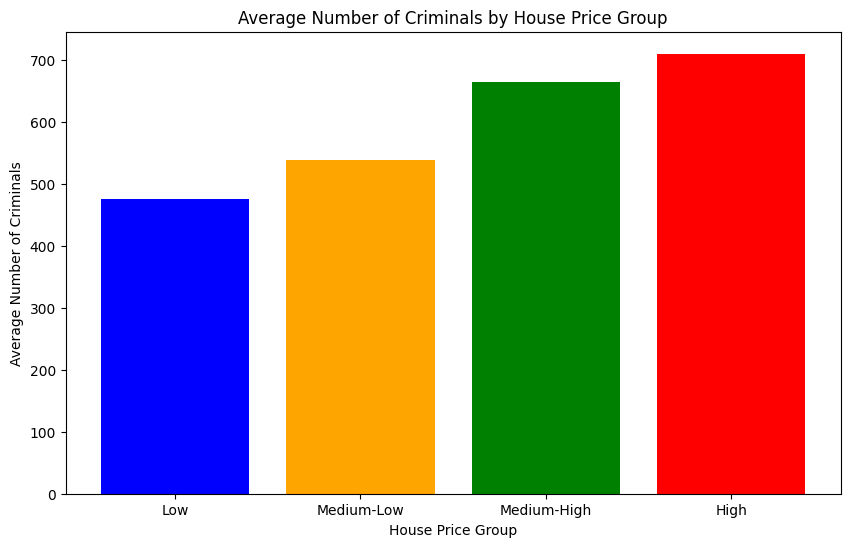

In [72]:
df = pd.read_sql("SELECT * FROM CAFINALTABLE", conn)

print(df.columns)
df['price_group'] = pd.qcut(df['list_price'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
grouped = df.groupby('price_group')['numCriminal'].mean().reset_index()

print(df['density_group'])


grouped.columns = ['Price Group', 'Average Number of Criminals']





print(grouped)
plt.figure(figsize=(10, 6))
plt.bar(grouped['Price Group'], grouped['Average Number of Criminals'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('House Price Group')
plt.ylabel('Average Number of Criminals')
plt.title('Average Number of Criminals by House Price Group')
plt.show()




   Price Group  Average Number of Criminals
0         High                  1103.649718
1          Low                   241.355114
2  Medium-High                   703.866667
3   Medium-Low                   357.718499


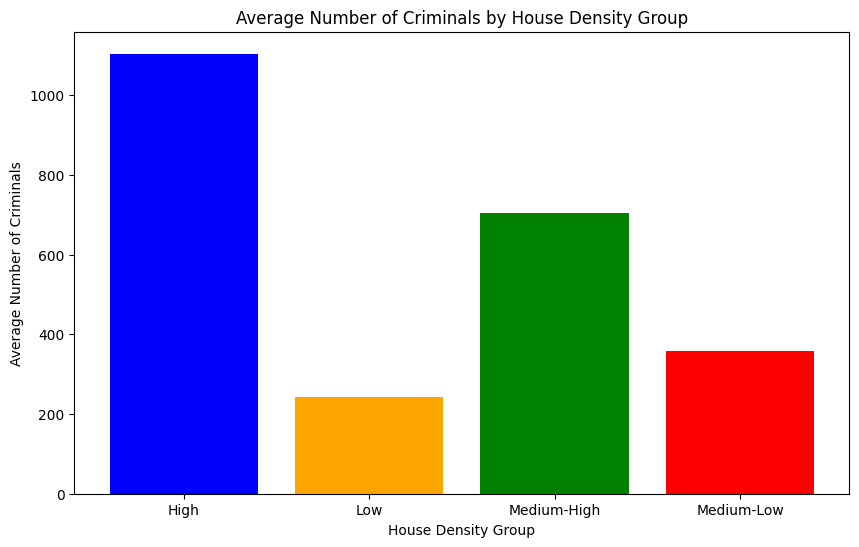

In [74]:
df['price_group'] = pd.qcut(df['list_price'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
grouped = df.groupby('density_group')['numCriminal'].mean().reset_index()
#print(df['density_group'])
grouped.columns = ['Price Group', 'Average Number of Criminals']
print(grouped)
plt.figure(figsize=(10, 6))
plt.bar(grouped['Price Group'], grouped['Average Number of Criminals'], color=['blue', 'orange', 'green', 'red'])
plt.xlabel('House Density Group')
plt.ylabel('Average Number of Criminals')
plt.title('Average Number of Criminals by House Density Group')
plt.show()

In [63]:
conn.commit()

What I can conclude from this data is that sex offenders can definitely be found more in urban areas. 

In [50]:
cursor.execute("PRAGMA table_info(CAFINALTABLE)")
results = cursor.fetchall()
print(results)

[(0, 'property_url', 'TEXT', 0, None, 0), (1, 'mls', 'TEXT', 0, None, 0), (2, 'mls_id', 'TEXT', 0, None, 0), (3, 'status', 'TEXT', 0, None, 0), (4, 'text', 'TEXT', 0, None, 0), (5, 'style', 'TEXT', 0, None, 0), (6, 'full_street_line', 'TEXT', 0, None, 0), (7, 'street', 'TEXT', 0, None, 0), (8, 'unit', 'TEXT', 0, None, 0), (9, 'city', 'TEXT', 0, None, 0), (10, 'state', 'TEXT', 0, None, 0), (11, 'zip_code', 'TEXT', 0, None, 0), (12, 'beds', 'REAL', 0, None, 0), (13, 'full_baths', 'REAL', 0, None, 0), (14, 'half_baths', 'REAL', 0, None, 0), (15, 'sqft', 'REAL', 0, None, 0), (16, 'year_built', 'REAL', 0, None, 0), (17, 'days_on_mls', 'INTEGER', 0, None, 0), (18, 'list_price', 'INTEGER', 0, None, 0), (19, 'list_date', 'TEXT', 0, None, 0), (20, 'sold_price', 'REAL', 0, None, 0), (21, 'last_sold_date', 'TEXT', 0, None, 0), (22, 'assessed_value', 'REAL', 0, None, 0), (23, 'estimated_value', 'REAL', 0, None, 0), (24, 'lot_sqft', 'REAL', 0, None, 0), (25, 'price_per_sqft', 'REAL', 0, None, 0), (

In [9]:
def predictSafety():



    conn = sqlite3.connect("HouseData.db")
    cursor = conn.cursor()
    # Fetching data
    cursor.execute("PRAGMA table_info(CA)")
    names = cursor.fetchall()
    print(names)
    #cursor.execute("SELECT list_price, numCriminal FROM CA WHERE density > 1000 And numCriminal > 0")
    finalData = cursor.fetchall()
    print(finalData[0])
    print("this is the length of the final data: " + str(len(finalData)))


    
  

    x = []
    y = []
    for (price, numCriminals) in finalData:
        x.append(price)
        y.append(numCriminals)
    

    

    log_prices = np.log(x)
    log_criminals = np.log(y)
        


    mean_x = np.mean(log_prices)
    median_x = np.median(log_prices)
    std_x = np.std(log_prices)

    mean_y = np.mean(log_criminals)
    median_y = np.median(log_criminals)
    std_y = np.std(log_criminals)

    print(f"Mean X: {mean_x}, Median X: {median_x}, Std X: {std_x}")
    print(f"Mean Y: {mean_y}, Median Y: {median_y}, Std Y: {std_y}")


    data = {'x': log_prices, 'y': log_criminals}
    correlation, p_value = pearsonr(log_prices, log_criminals)
    print("this is the coreelation: " + str(correlation))
    print("this is the p value: " + str(p_value))
    df = pd.DataFrame(data)

    plt.scatter(df['x'], df['y'], color='blue', label='Original Data')

    correlation, p_value = pearsonr(log_x_values, log_y_values)


    params, covariance = curve_fit(neg_exp_decay, df['x'], df['y'])
    df['predicted'] = neg_exp_decay(df['x'], *params)
    df['residuals'] = df['y'] - df['predicted']

    # Calculate the z-score of the residuals
    median_residuals = np.median(df['residuals'])
    mad_residuals = np.median(np.abs(df['residuals'] - median_residuals))
    df['residuals_mad'] = np.abs(df['residuals'] - median_residuals) / mad_residuals

    # Define a threshold for identifying outliers using MAD
    threshold = 3
    df_no_outliers = df[df['residuals_mad'] <= threshold]


    # Re-fit the model to the data without outliers
    params_no_outliers, covariance_no_outliers = curve_fit(neg_exp_decay, df_no_outliers['x'], df_no_outliers['y'])
    df_no_outliers['predicted'] = neg_exp_decay(df_no_outliers['x'], *params_no_outliers)

    # Plot the data
    plt.figure(figsize=(10, 6))

    # Plot original data
    plt.scatter(df['x'], df['y'], color='blue', label='Original Data')
    # Plot fitted curve on original data
    plt.plot(df['x'], df['predicted'], color='blue', linestyle='--', label='Fitted Curve (Original Data)')

    # Plot data without outliers
    plt.scatter(df_no_outliers['x'], df_no_outliers['y'], color='red', label='Data without Outliers')
    # Plot fitted curve on data without outliers
    plt.plot(df_no_outliers['x'], df_no_outliers['predicted'], color='red', label='Fitted Curve (No Outliers)')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Negative Exponential Decay Model with Outlier Removal')
    plt.legend()
    plt.show()

    return df

In [ ]:
df = predictSafety()

In [191]:
print("hello")

hello


In [ ]:
plt.scatter(df['x'], df['y'], color='blue', label='Original Data')

In [ ]:
def normalizeData(hashy):
    addresses = []
    prices = []
    numCriminals = []
    for key in hashy.keys():
        #print("THIS IS THE KEY:" + str(key))

        #if there is a dollar sign, then we have the price and the number of criminals nearby
        #print("this is key[1]:" + str(key[1])
        
            #if ("$" in key[1]):
           #     price = key[1].replace('$', '')
          #      price = price.replace(',', '')
            
        #    if ("From" in key[1]):
         #       price = price.replace("From", "")
        
        #print("this is the price:" + str(price))
        price = key[1].replace(",", "")
        
        prices.append(price)
        addresses.append(key[0])
        
        if (hashy[key] == 0):
            numCriminals.append(0)
        else:
            numCriminals.append(hashy[key])

    print("length of addresses:" + str(len(addresses)))
    print("length of prices:" + str(len(prices)))
        


    
  
    

    numCriminals = np.array(numCriminals).reshape(-1, 1)
    numCriminals.remove(maxIndex)
    scaler_price = MinMaxScaler(feature_range=(0, 4))
    scaler_criminals =MinMaxScaler(feature_range=(0, 2))
    scaled_prices = scaler_price.fit_transform(prices)
    scaled_numCriminals = scaler_criminals.fit_transform(numCriminals)

    # Creating the DataFrame
    df = pd.DataFrame({
        'Price': scaled_prices.flatten(),  # Flatten to convert from 2D back to 1D
        'numCriminals': scaled_numCriminals.flatten()
    })

    # Calculate the safety rating
    df["safetyRating"] = df['numCriminals'] + df['Price'] / 2


    
    plt.scatter(df["Price"], df["numCriminals"])

    plt.show()
    
    
    return df

In [ ]:
cursor.execute('''
CREATE TABLE StateHouseData2 AS
SELECT *
FROM StateHouseData
WHERE 1=0;
''')

cursor.execute('''
INSERT INTO StateHouseData2
SELECT *
FROM StateHouseData;
''')

In [ ]:
cursor.execute("SELECT * from StateHouseData")
rows = cursor.fetchall()

print(rows[12])

